# The Empirical Rule and Normal Distribution
---

The Empirical Rule describes how many observations fall within a certain distance from the mean of the dataset. This rule applies to normally distributed populations.

To understand the empirical rule, it is important to understand the meaning of 'standard deviation'.

The standard deviation, or SD, is often denoted  𝜎
(sigma). For any distribution, the standard deviation is the "typical" distance of a single randomly selected value from the mean. To be precise, the standard deviation is defined to be the square root of the average squared distance of an observation from the mean. Since this definition involves squaring, and then taking a square root, the standard deviation has the same units as the data (e.g. if the data are measured in centimeters, then the SD has units of centimeters as well).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# population mean
mu = 7
# population standard deviation
sigma = 1.5

# generating a large set of random observations
observations = np.random.normal(mu, sigma, size = 100000)

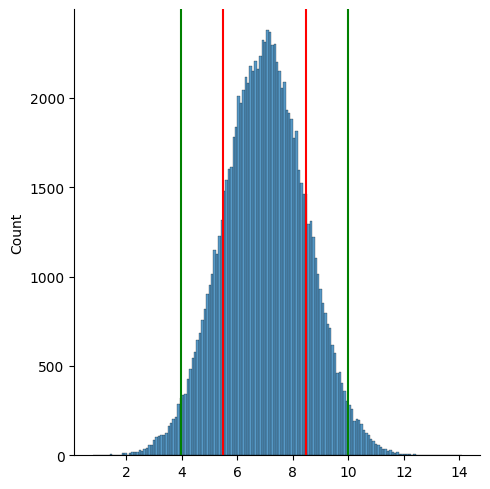

In [ ]:
sns.displot(observations)

plt.axvline(np.mean(observations) + np.std(observations), color = 'red')
plt.axvline(np.mean(observations) - np.std(observations), color = 'red')

plt.axvline(np.mean(observations) + (2 * np.std(observations)), color = 'green')
plt.axvline(np.mean(observations) - (2 * np.std(observations)), color = 'green')

In [ ]:
pd.Series(observations).describe()

,0
count,100000.000000
mean,6.995123
std,1.501166
min,0.807223
25%,5.986532
50%,7.000300
75%,8.010036
max,14.078004


Next, we randomly subsample from the large set of data generated above.

In [ ]:
sampleA = np.random.choice(observations, 500)
sampleB = np.random.choice(observations, 500)
sampleC = np.random.choice(observations, 500)

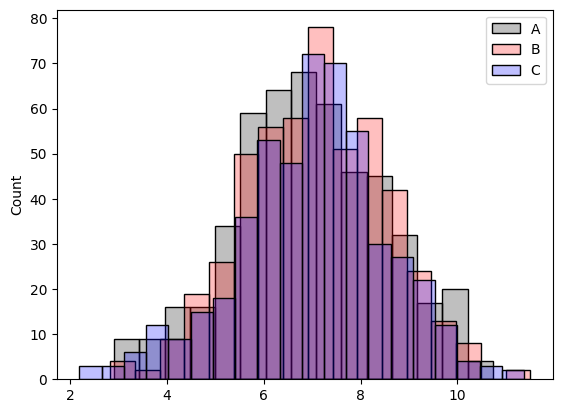

In [ ]:
fig, ax = plt.subplots()

sns.histplot(sampleA, ax = ax, color = 'black', alpha = 0.25, label = 'A')
sns.histplot(sampleB, ax = ax, color = 'red', alpha = 0.25, label = 'B')
sns.histplot(sampleC, ax = ax, color = 'blue', alpha = 0.25, label = 'C')
plt.legend();

Approximately, 68% of each sample falls within one standard deviation of the mean.

In [ ]:
print((np.abs(sampleA - mu) < 1 * sigma).mean())
print((np.abs(sampleB - mu) < 1 * sigma).mean())
print((np.abs(sampleC - mu) < 1 * sigma).mean())

0.654
0.7
0.7


Now, let's consider a population that is not normal. For example, we can sample from the standard exponential distribution, which has mean 1 and standard deviation 1.

In [ ]:
exp_data = np.random.exponential(size = 1000)

<Axes: ylabel='Count'>

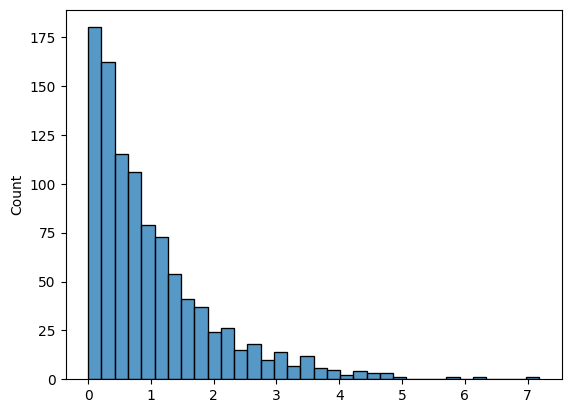

In [ ]:
sns.histplot(exp_data)

In [ ]:
# 1 SD away
print("Percentage of data within 1 SD: {}".format((np.abs(exp_data - 1) < 1).mean()))
# 2 SD away
print("Percentage of data within 2 SD: {}".format((np.abs(exp_data - 1) < 2).mean()))

Percentage of data within 1 SD: 0.858
Percentage of data within 2 SD: 0.94


This shows that a far greater fraction of data fall within 1 standard deviation of the mean compared to the empirical rule (86% vs 68%).

The Student t distribution with three degrees of freedom has mean of 0 and a variance of 3, so the standard deviation is $\sqrt(3) = 1.73$.

In [ ]:
t_data = np.random.standard_t(3, size = 1000)

In [ ]:
# 1 SD away
print("Percentage of data within 1 SD: {}".format((np.abs(t_data - 0) < np.sqrt(3)).mean()))
# 2 SD away
print("Percentage of data within 2 SD: {}".format((np.abs(t_data - 0) < (2 * np.sqrt(3))).mean()))

Percentage of data within 1 SD: 0.798
Percentage of data within 2 SD: 0.96


Again, a far greater fraction of the data falls within one standard deviation of the mean than would occur under the empirical rule.

# Empirical Distribution Function
---

The Empirical Distribution Function is a cumulative density function that gives the proportion of observations that are less than or equal to a given value.

Using a normally distributed dataset for hours of sleep,we can create an empirical distribution function in Python that estimates the population proportion of observations falling below a given number of hours of sleep.

In [ ]:
mu = 7
sigma = 1.5

In [ ]:
sleep_data = np.random.normal(mu, sigma, size = 100000)

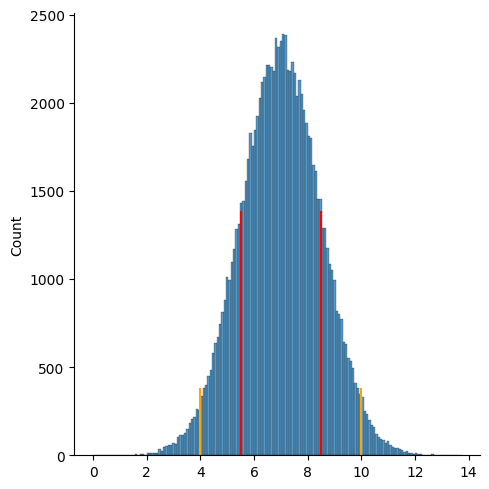

In [ ]:
sns.displot(sleep_data)

plt.axvline(np.mean(sleep_data) + np.std(sleep_data), 0, 0.55, color = 'red')
plt.axvline(np.mean(sleep_data) - np.std(sleep_data), 0, 0.55, color = 'red')

plt.axvline(np.mean(sleep_data) + (2 * np.std(sleep_data)), 0, 0.15, color = 'orange')
plt.axvline(np.mean(sleep_data) - (2 * np.std(sleep_data)), 0, 0.15, color = 'orange')

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
test_values = np.random.normal(5, 1.5, 1000)
new_ecdf = ECDF(test_values)

In [ ]:
new_ecdf(np.quantile(test_values , 0.5))

np.float64(0.5)

In [ ]:
ecdf = ECDF(sleep_data)

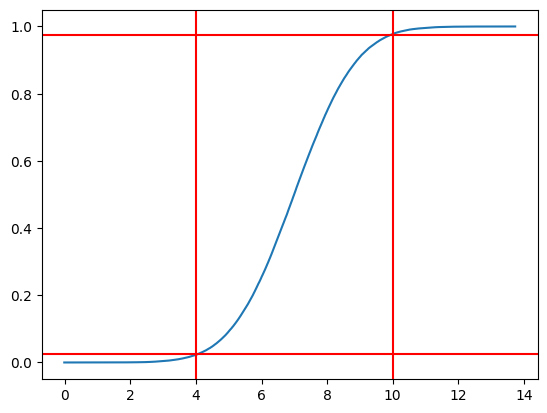

In [ ]:
plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'red', linestyle = '-')
plt.axvline(x = np.mean(sleep_data) - (2 * np.std(sleep_data)), color = 'red', linestyle = '-')

plt.axhline(y = 0.975, color = 'red', linestyle = '-')
plt.axvline(x = np.mean(sleep_data) + (2 * np.std(sleep_data)), color = 'red', linestyle = '-');

# Notes
---

* The Empirical Rule describes the distribution of data and how far an individual datapoint is from the mean of the data. Applicable for normally distributed data. Other distributions of data, for example, exponentially distributed data has 85% of data within one 1 SD of the mean.

* `ECDF` from statsmodels creates an Empirical Cumulative Distribution Function which acts as a function in following ways: given a particular value (x) t returns a value (y) which describes the quantile of the data. If input is median, then the value returned is 0.5

Text(0.5, 1.0, 'Mean: 5 | SD: 1.75')

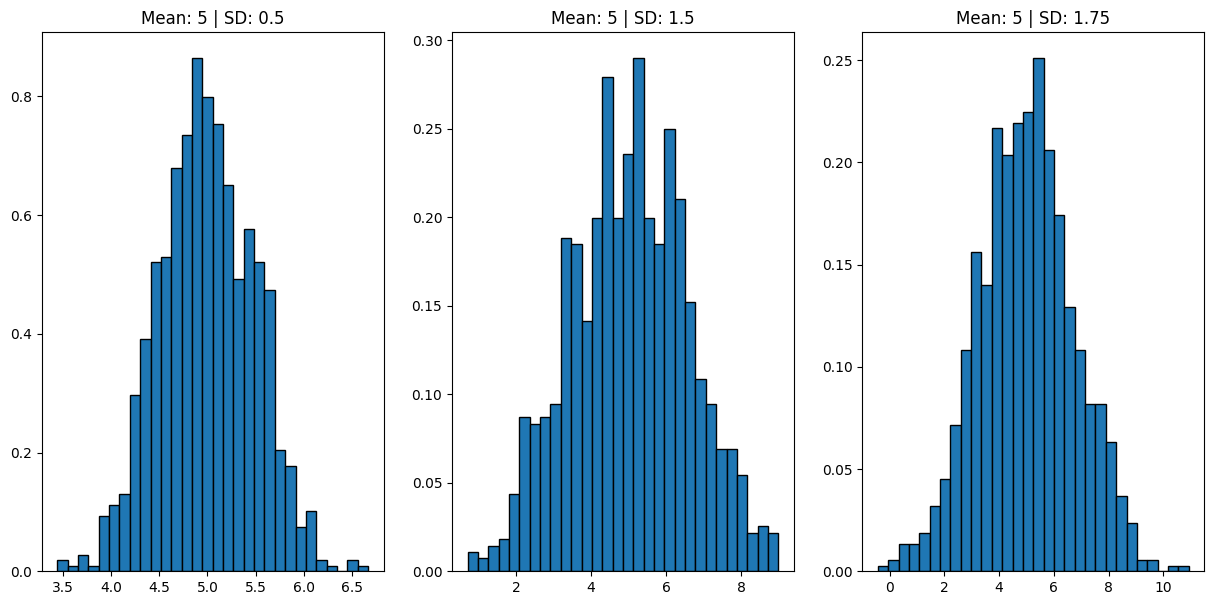

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 7))


plt.subplot(1, 3, 1)
# 1000 samples (df=10) and histogram
samples2 = np.random.normal(loc = 5, scale = 0.5, size = 1000)
plt.hist(samples2, bins=30, edgecolor='black', density=True)
plt.title('Mean: 5 | SD: 0.5')


plt.subplot(1, 3, 2)
samples3 = np.random.normal(loc = 5, scale = 1.5, size = 1000)
plt.hist(samples3, bins=30, edgecolor='black', density=True)
plt.title('Mean: 5 | SD: 1.5')


plt.subplot(1, 3, 3)
samples4 = np.random.normal(loc = 5, scale = 1.75, size = 1000)
plt.hist(samples4, bins=30, edgecolor='black', density=True)
plt.title('Mean: 5 | SD: 1.75')




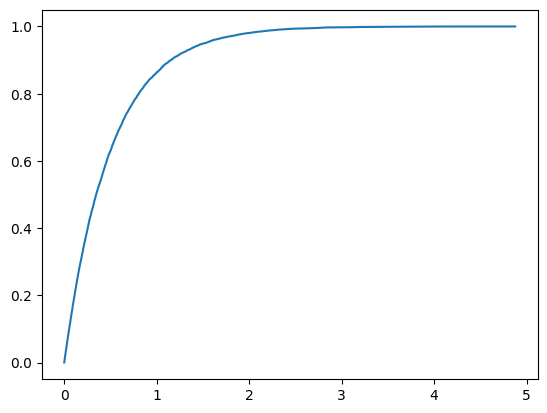

In [ ]:
exp_trial_data = np.random.exponential(scale = 0.5, size = 10000)

ecdf = ECDF(exp_trial_data)

plt.plot(ecdf.x, ecdf.y)